In [1]:
from logicqubit.logic import *
from logicqubit.zhegalkin import *

logicqubit-gpu version 1.5.3


In [2]:
# Uf*H|x1,x2,x3,x4>|0000>
# x1 x2 x3 x4 y1 y2 y3 y4
# 0  0  0  0  0  0  0  0
# 0  0  0  1  0  1  1  0
# 0  0  1  0  0  0  0  0
# 0  0  1  1  1  1  1  1
# 0  1  0  0  0  1  1  0
# 0  1  0  1  0  0  0  1
# 0  1  1  0  0  0  1  0
# 0  1  1  1  0  1  1  0
# 1  0  0  0  0  0  1  1
# 1  0  0  1  0  0  1  1
# 1  0  1  0  1  0  0  1
# 1  0  1  1  1  1  0  0
# 1  1  0  0  1  0  1  1
# 1  1  0  1  0  0  1  1
# 1  1  1  0  0  1  0  1
# 1  1  1  1  0  0  0  0


poly = Zhegalkin_Poly()
poly.addTable(['0011','1010','1011','1100'])                                    # y1
poly.addTable(['0001','0011','0100','0111','1011','1110'])                      # y2
poly.addTable(['0001','0011','0100','0110','0111','1000','1001','1100','1101']) # y3
poly.addTable(['0011','0101','1000','1001','1010','1100','1101','1110'])        # y4
poly.Compute()
poly.ShowPolynomial()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

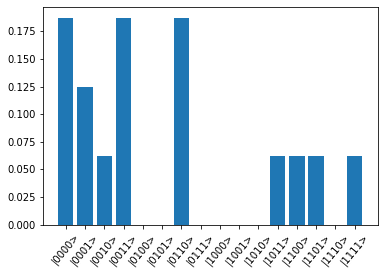

In [4]:
logicQuBit = LogicQuBit(10)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()
x4 = Qubit()

a1 = Qubit() # ancilla qubit, usados em série
a2 = Qubit()

y1 = Qubit()
y2 = Qubit()
y3 = Qubit()
y4 = Qubit()

x1.H()
x2.H()
x3.H()
x4.H()

# p/ y1
a1.CCX(x1,x2)
y1.CCX(x4,a1)
a1.CCX(x1,x2) # limpar a1

y1.CCX(x1,x2)

a1.CCX(x1,x3)
y1.CCX(x4,a1)
a1.CCX(x1,x3) # limpar a1

y1.CCX(x1,x3)

a1.CCX(x2,x3)
y1.CCX(x4,a1)
a1.CCX(x2,x3) # limpar a1

y1.CCX(x3,x4)

# p/ y2
y2.CCX(x1,x2)

a1.CCX(x1,x3)
y2.CCX(x4,a1)
a1.CCX(x1,x3) # limpar a1

y2.CCX(x1,x4)

y2.CCX(x2,x3)

a1.CCX(x1,x3)
y2.CCX(x4,a1)
a1.CCX(x1,x3) # limpar a1

y2.CCX(x1,x3)
y2.CX(x2)
y2.CX(x4)

# p/ y3
a1.CCX(x1,x2)
a2.CCX(x3,a1)
y3.CCX(x4,a2)
a2.CCX(x3,a1) # limpar a2
a1.CCX(x1,x2) # limpar a1

y3.CCX(x1,x2)
y3.CCX(x1,x3)
y3.CCX(x1,x4)

y3.CX(x1)

a1.CCX(x2,x3)
y3.CCX(x4,a1)
a1.CCX(x2,x3) # limpar a1

y3.CX(x2)
y3.CX(x4)

# p/ y4
a1.CCX(x1,x2)
y4.CCX(x4,a1)
a1.CCX(x1,x2) # limpar a1

y4.CX(x1)

y4.CCX(x2,x4)
y4.CCX(x3,x4)

res = logicQuBit.Measure([y1,y2,y3,y4], True)
logicQuBit.Plot()